In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


In [71]:
quad_time = pd.read_csv('data/quadratic_time.csv')
double_time = pd.read_csv('data/double_time.csv')
graph_time = pd.read_csv('data/graphic_time.csv')

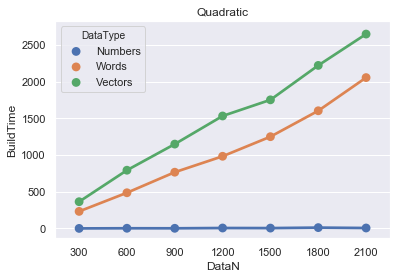

In [72]:
sns.pointplot(data=quad_time, x="DataN", y='BuildTime', hue="DataType",)
plt.title('Quadratic')
plt.show()

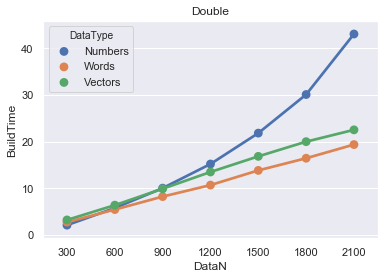

In [73]:
sns.pointplot(data=double_time, x="DataN", y='BuildTime', hue="DataType",)
plt.title('Double')
plt.show()

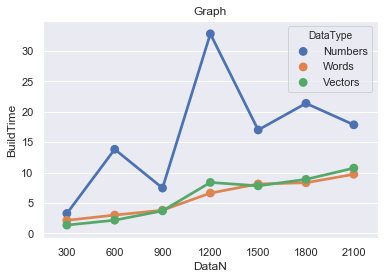

In [74]:
sns.pointplot(data=graph_time, x="DataN", y='BuildTime', hue="DataType")
plt.title('Graph')
plt.show()